In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import itables

In [4]:
conn_str = os.getenv('CRAIGGER_CONN') #make sure the tunnel is open
engine = create_engine(conn_str)

In [5]:
pd.read_sql('SELECT * FROM joined_results ORDER BY post_date DESC LIMIT 5;', con=engine)

,mapaddress,geo.region,post_hood,address,quality,lat,lng,zip,craig_address_hash,gconfidence,post_price,post_date,post_bedroom_count,post_sqft,price_per_sqft,netloc,housing,furnished,crawl_date
0,411 N. Euclid Street,US-CA,(Fullerton),"411 N Euclid St, Fullerton, CA 92832, USA",premise,33.874401,-117.942657,92832,3490384837,9.0,2160,2022-04-19,1,704.0,3.068182,orangecounty.craigslist.org,/ 1br - 704ft2 -,False,2022-04-20
1,100 Wycliffe,US-CA,(Irvine),"100 Wycliffe, Irvine, CA 92602, USA",premise,33.720993,-117.784808,92602,1784416290,9.0,2685,2022-04-19,1,772.0,3.477979,orangecounty.craigslist.org,/ 1br - 772ft2 -,False,2022-04-20
2,141 Golf Club Road near Contra Costa Blvd.,US-CA,(concord / pleasant hill / martinez),"141 Golf Club Rd, Pleasant Hill, CA 94523, USA",premise,37.971061,-122.065634,94523,2166823907,9.0,2245,2022-04-19,2,880.0,2.551136,sfbay.craigslist.org,/ 2br - 880ft2 -,False,2022-04-20
3,939 Heather Circle,US-CA,(Salinas),"939 Heather Cir, Salinas, CA 93906, USA",street_address,36.691941,-121.656089,93906,2937326222,9.0,1850,2022-04-19,1,650.0,2.846154,monterey.craigslist.org,/ 1br - 650ft2 -,False,2022-04-20
4,3070 E Frontera Street,US-CA,(Anaheim),"3070 E Frontera St, Anaheim, CA 92806, USA",premise,33.845510,-117.856006,92806,3563326373,9.0,1775,2022-04-19,None,550.0,3.227273,orangecounty.craigslist.org,/ 550ft2 -,False,2022-04-20


In [6]:
df = pd.read_sql('SELECT * FROM joined_results;', con=engine)
df.shape

(382882, 19)

In [7]:
df.to_csv('joined_results_feb13.tsv', sep='\t', index=False)

In [8]:
itables.show(df.groupby(['post_date','netloc']).count())

/home/rcpt/.virtualenvs/craigpynb/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


<AxesSubplot:xlabel='post_date', ylabel='price_per_sqft'>

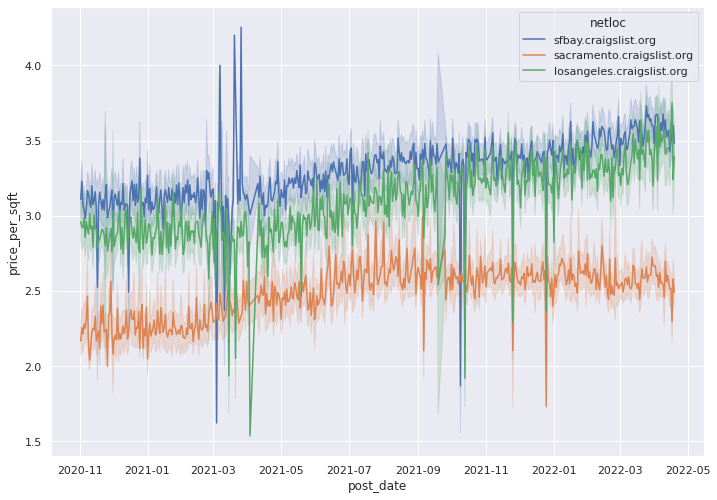

In [9]:
netlocs = ['losangeles.craigslist.org', 'sfbay.craigslist.org',
           'sacramento.craigslist.org', 'orangecountry.craigslist.org']
dfp = df[df.netloc.map(lambda x:x in netlocs)
         & (df.post_date > pd.to_datetime('2020-11-01'))
         & (1.5 < df.price_per_sqft)
         & (df.price_per_sqft < 5.0)]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y="price_per_sqft", 
    x="post_date",
    hue="netloc", 
    data=dfp)
    

In [13]:
df['netloc'].value_counts()

sfbay.craigslist.org           72899
orangecounty.craigslist.org    65008
losangeles.craigslist.org      60042
sandiego.craigslist.org        55404
sacramento.craigslist.org      37621
inlandempire.craigslist.org    30436
ventura.craigslist.org         14529
fresno.craigslist.org          13552
monterey.craigslist.org         7024
stockton.craigslist.org         4596
bakersfield.craigslist.org      3716
chico.craigslist.org            3452
santabarbara.craigslist.org     2244
palmsprings.craigslist.org      2190
slo.craigslist.org              1977
visalia.craigslist.org          1676
modesto.craigslist.org          1656
hanford.craigslist.org          1422
santamaria.craigslist.org       1066
redding.craigslist.org           843
goldcountry.craigslist.org       529
humboldt.craigslist.org          324
yubasutter.craigslist.org        231
merced.craigslist.org            179
mendocino.craigslist.org         130
imperial.craigslist.org           63
siskiyou.craigslist.org           40
s